<a href="https://colab.research.google.com/github/dbsdlsdud/AIStudy24/blob/master/k_%EC%B5%9C%EA%B7%BC%EC%A0%91%ED%95%9C%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

농어 무게를 예측하는 k-최근접 알고리즘을 사용해서 회귀 모델을 사용해 본 결과 원본 데이터의 개수 부족으로 정확한 예측이 어려울 수 있다라는 결론이 생겼다.

길이가 50cm인 농어가 들어왔을때 회귀는 ? (한계점이 생긴다)

In [ ]:
import numpy as np # 넘파이를 이용한 배열 생성, 농어 샘플자료 56개
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

훈련세트와 테스트세트로 나눈 후 2차원 배열로 만들기

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
# 훈련세트와 테스트세트로 나눈 결과는 튜플로 나온다.
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

1. -1 지정하면 원소 개수로 모두 채우라는 의미
2.  (행,열) -> 행에 -1을 넣고 열 값을 지정하면 배열의 행 수는 알아서 지정이 된다.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor # 회귀용
# 주어진 데이터에서 K개의 최근접 이웃을 찾아 그들의 평균을 사용해 예측하는 회귀 모델
knr = KNeighborsRegressor(n_neighbors=3) # 최근접 이웃 3개 참조
knr.fit(train_input, train_target) # 훈련 시작
print(knr.predict([[50]])) # 50cm인 농어의 무게 예측 결과 1,033g

[1033.33333333]


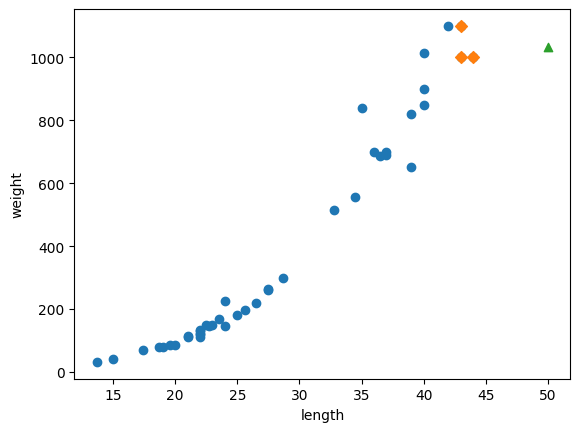

In [ ]:
import matplotlib.pyplot as plt
# matplotlib : 파이썬에서 과학 계산용 그래프를 그리는 대표적인 패키지
distances, indexes = knr.kneighbors([[50]])
# 내가 알고 싶은 값의 거리(distances)와 인덱스(indexes)
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 훈련 세트 중 이웃 샘플만 마름모로 표시
plt.scatter(50,1033,marker='^') # 50cm 농어 데이터와 위에서 예측한 결과값을 삼각형으로 표시
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(np.mean(train_target[indexes])) # 45cm 근방으로 평균값이 나왔다.

1033.3333333333333


In [ ]:
print(knr.predict([[100]])) # 100cm로 지정했을 때 결과 : 1,033g

[1033.33333333]


기본 데이터가 부족해서 한계가 있다.

100cm 농어의 이웃 구해보기

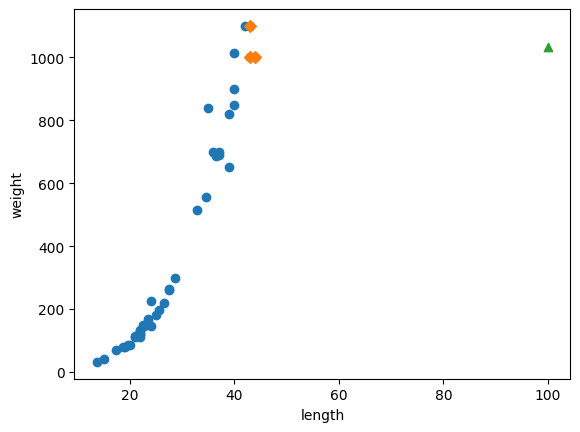

In [ ]:
distances, indexes = knr.kneighbors([[100]])
# 내가 알고 싶은 값의 거리(distances)와 인덱스(indexes)
plt.scatter(train_input, train_target) # 훈련세트 산점도 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
#훈련 세트 중 이웃 샘플만 마름모로 표시
plt.scatter(100, 1033, marker='^') # 100cm 농어 데이터와 위에서 예측한 결과값을 삼각형으로 표시
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

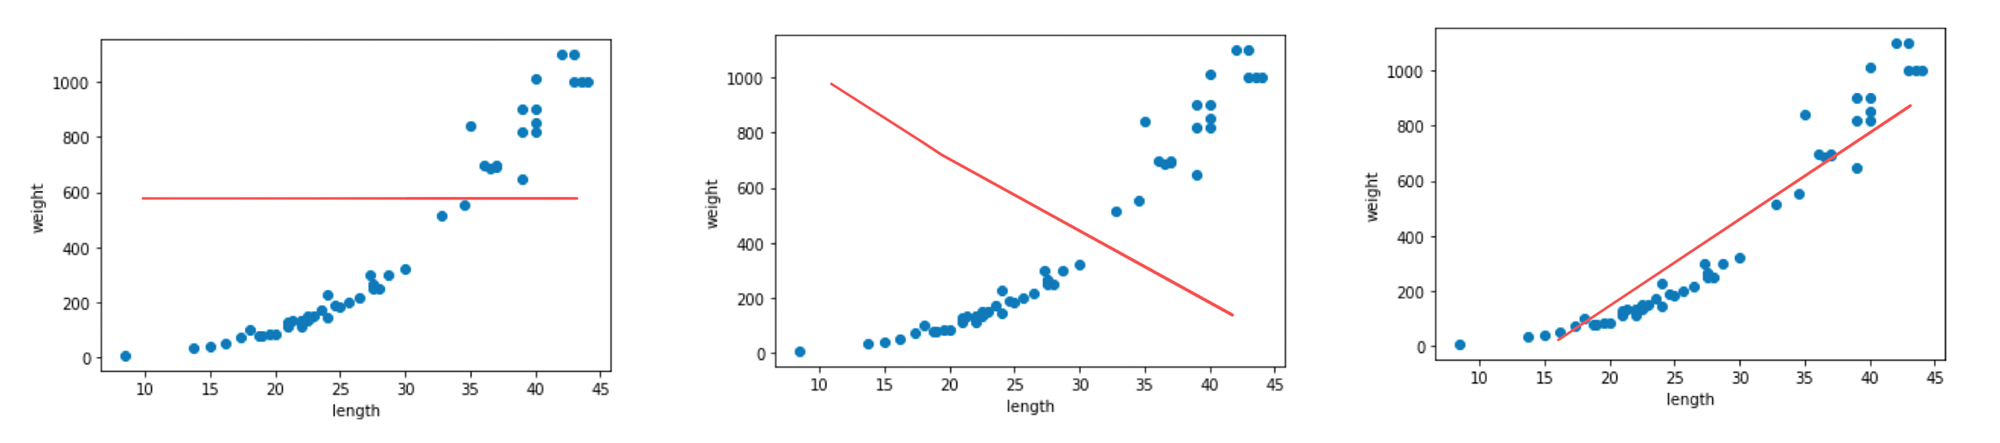

k-최근접 이웃 알고리즘에 대한 해결 방법 -> 선형회귀(linear)사용하기

선형회귀는 비교적 간단하고 성능이 뛰어나다. 선형이라는 말에서 짐작할 수 있듯이 직선을 학습하는 알고리즘이다.

1. 빨간 선이 가로로 되어 있으면 농어의 무게를 1개로 인식한다.
2. 빨간 선이 위에서 시작해서 아래로 떨어지면 반대로 예측한다.
3. 빨간 선이 아래에서 시작해서 위로 올라가면 정상적인 차트로 구현이 된다.

사이킷런에서 제공하는 .linear_model 모듈 안에 LinearRegression 선형 회귀용 클래스 사용해보기

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # 객체 생성 후 변수에 연결
lr.fit(train_input, train_target) # 훈련 시작

LinearRegression()

# 직선의 방정식
* 농어의 무게(15) * 기울기(coef_) + 절편(intercept_) (y(농어의 무게) = a * x(농어의 길이) + b)
* 농어의 무게(15) * 기울기(coef_) + 절편(intercept_) (농어의 무게(50) * 기울기(coef_) + 절편(intercept_))

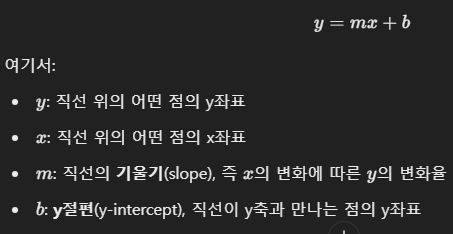

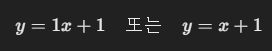

In [ ]:
print(lr.predict([[50]]))

[1241.83860323]


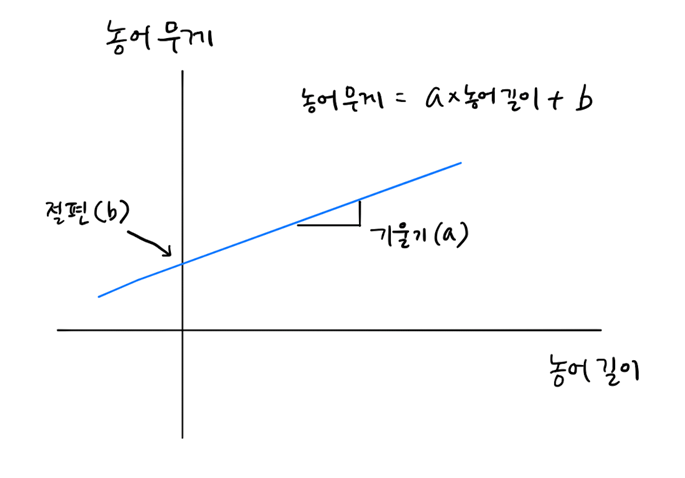

In [ ]:
print('훈련세트 : ',lr.score(train_input, train_target))
print('테스트세트 : ',lr.score(test_input, test_target))

훈련세트 :  0.939846333997604
테스트세트 :  0.8247503123313558


훈련세트가 테스트에 비해 높지만 차이가 많이 남으로 과소적합이라고 한다.

In [ ]:
print([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
print(lr.coef_, lr.intercept_) # lr.coef_ 계수, lr,intercept_ 인터셉트
# 기울기를 종종 계수(coefficent), 가중치(weight)라고도 부른다.

[15, 50] [array([-123.7614705]), array([1241.83860323])]
[39.01714496] -709.0186449535477


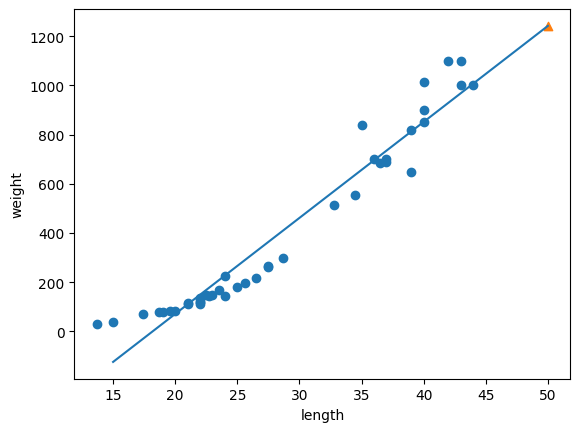

In [ ]:
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.scatter(50,1241.8,marker='^') # 50cm 농어 데이터와 위에서 계산한 값을 삼각형으로 표시
plt.xlabel('length')
plt.ylabel('weight')
plt.show() # 그래프로 표시

예측은 가능하지만 직선이라 값이 너무 직선적이다.

선형회귀 문제점 : 왼쪽 하단에 있는 기준점이 불일치가 된다.

해결방법 : 곡선 만들기

다항회귀(Polynomial Regression)는 2차원 방정식의 그래프로 그리려면 길이를 제곱 한 항이 훈련세트에 추가 되어야 한다.

In [ ]:
train_poly = np.column_stack((train_input ** 2, train_input))
# 제곱한 것과 두 배열을 나란히 붙인다.
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [ ]:
print(train_poly) # [제곱값, 일반값]

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 [ 625.     25.  ]
 [1600.     40.  ]
 [1521.     39.  ]
 [1849.     43.  ]
 [ 484.     22.  ]
 [ 400.     20.  ]
 [ 484.     22.  ]
 [ 576.     24.  ]
 [ 756.25   27.5 ]
 [1849.     43.  ]
 [1600.     40.  ]
 [ 576.     24.  ]
 [ 441.     21.  ]
 [ 756.25   27.5 ]
 [1600.     40.  ]
 [1075.84   32.8 ]
 [ 702.25   26.5 ]
 [1332.25   36.5 ]
 [ 187.69   13.7 ]
 [ 515.29   22.7 ]
 [ 225.     15.  ]
 [1369.     37.  ]
 [1225.     35.  ]
 [ 823.69   28.7 ]
 [ 552.25   23.5 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [ 529.     23.  ]
 [ 484.     22.  ]
 [1936.     44.  ]
 [ 506.25   22.5 ]
 [ 361.     19.  ]
 [1369.     37.  ]
 [ 484.     22.  ]
 [ 655.36   25.6 ]
 [1764.     42.  ]
 [1190.25   34.5 ]]


In [ ]:
lr = LinearRegression() # 선형회귀 객체 생성
lr.fit(train_poly, train_target) # 훈련 시작
print(lr.predict([[50**2, 50]])) # 결과 테스트
# 테스트할 때 이 모델의 농어 길이의 제곱과 원래 길이를 함께 넣음

[1573.98423528]


In [ ]:
print('계수 : ',lr.coef_,'인터셉트 : ',lr.intercept_)

계수 :  [  1.01433211 -21.55792498] 인터셉트 :  116.0502107827827


In [ ]:
point = np.arange(15,50)
print(point, 1.01 * point **2 - 21.6 * point + 116.05)

[15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44 45 46 47 48 49] [  19.3    29.01   40.74   54.49   70.26   88.05  107.86  129.69  153.54
  179.41  207.3   237.21  269.14  303.09  339.06  377.05  417.06  459.09
  503.14  549.21  597.3   647.41  699.54  753.69  809.86  868.05  928.26
  990.49 1054.74 1121.01 1189.3  1259.61 1331.94 1406.29 1482.66]


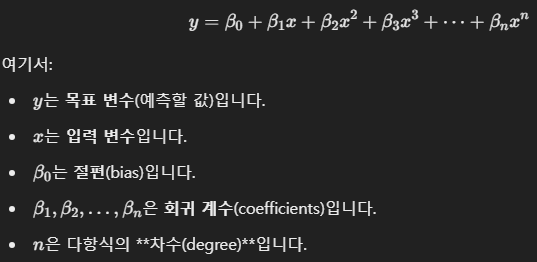

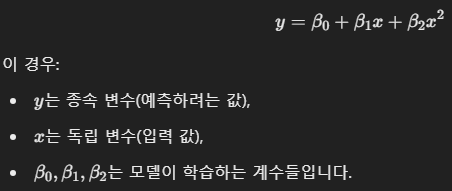

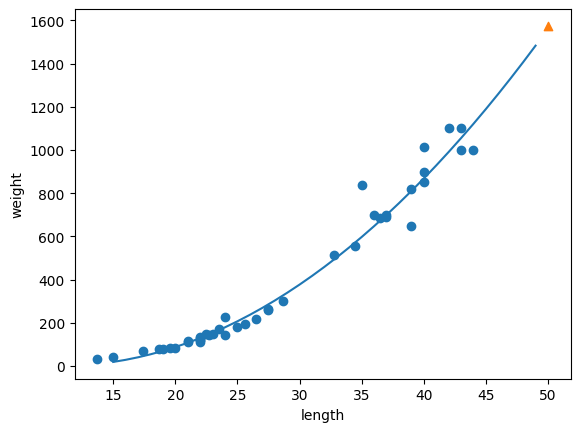

In [ ]:
point = np.arange(15,50)
# 구간별 직선을 그리기 위한 15~49까지의 정수배열 생성
plt.scatter(train_input, train_target)
plt.plot(point, 1.01 * point **2 - 21.6 * point + 116.05) # 다항회귀 공식 적용
plt.scatter([50], [1574],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


* 문제 해결을 위해 선형회귀와 다항회귀를 통해 문제를 해결하려고 했지만 아직 모델에 과소적합이 남아있다.
* -> 해결하기 위해 조금 더 복잡한 모델을 만들어야 할 것 같다
* -> 복잡한 모델을 만들다가 너무 복잡해진 경우 모델의 복잡도를 억제하는 방법도 알아봐야 할 것 같다